In [11]:
import matplotlib.pyplot as plt 
import pandas as pd

In [144]:
rpidf = pd.read_csv('../saved_results/pi/pi2.csv') 
frododf_1= pd.read_csv('../saved_results/frodo/frodo2.csv')  #1 GPU
frododf_3 = pd.read_csv('../saved_results/frodo/frodo3.csv') #2 GPU 
mac_df = pd.read_csv('../saved_results/mac/mac2.csv')

frodo_avg = pd.read_csv('../saved_results/frodo/f_averages.csv')

In [146]:
neurons = []
pi_times = []
frodo_times_1 = []
frodo_times_3 = []
mac_times = []
frod_times_avg = []

for i in rpidf.values.tolist():
    neurons.append(i[0])
    pi_times.append(i[1])
for i in frododf_1.values.tolist():
        frodo_times_1.append(i[1])
for i in frododf_3.values.tolist():
        frodo_times_3.append(i[1])
for i in mac_df.values.tolist():
        mac_times.append(i[1])
for i in frodo_avg.values.tolist():
        frod_times_avg.append(i[2])

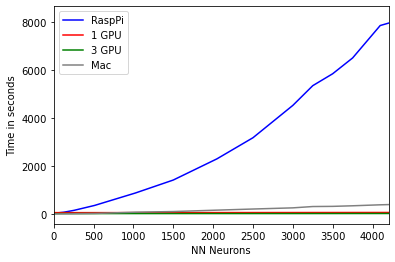

In [14]:
plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
plt.plot(neurons, pi_times, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.plot(neurons, mac_times, 'gray', label='Mac')
#plt.plot(neurons, frod_times_avg, label='average')
plt.legend()
plt.savefig('../saved_results/figures/raw_comparison.png')
img = plt.show()

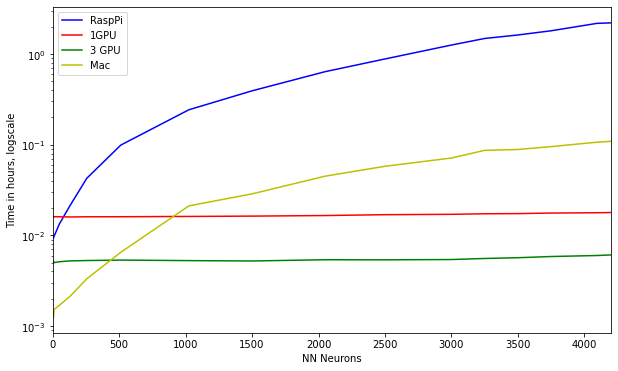

In [27]:
pi_timesh = [t/3600 for t in pi_times]
frodo_times_1h = [t/3600 for t in frodo_times_1]
frodo_times_3h = [t/3600 for t in frodo_times_3]
mac_timesh = [t/3600 for t in mac_times]

plt.figure(figsize=(10,6))
plt.xlim(0,4200)
plt.xlabel('NN Neurons')
plt.ylabel('Time in hours, logscale')
plt.yscale('log')
plt.plot(neurons, pi_timesh, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1h, 'r', label='1GPU')
plt.plot(neurons, frodo_times_3h, 'g', label='3 GPU')
plt.plot(neurons, mac_timesh, 'y', label='Mac')
plt.legend()
plt.savefig('../saved_results/figures/raw_comparison_hours.png')
plt.show()


In [16]:
## Zoom in

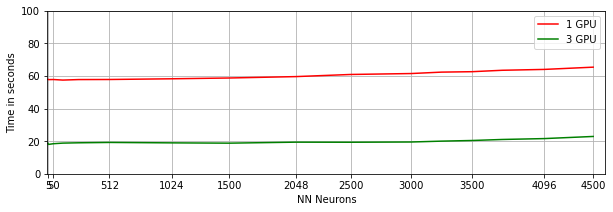

In [17]:
ticks = [5,50,512,1024,1500,2048,2500,3000,3500,4096,4500]

plt.figure(figsize=(10,3))
plt.xlim(0,4600)
plt.ylim(0,100)
plt.xticks(ticks)
plt.grid(True)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')
#plt.plot(neurons, pi_times, 'b')
#plt.plot(neurons, mac_times, 'gray', label='Mac')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.legend()
plt.savefig('../saved_results/figures/gpu1v3.png', bbox_inches='tight')
plt.show()

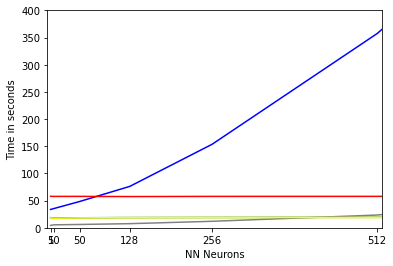

In [18]:
plt.xticks(neurons)
plt.xlim(0,520)
plt.ylim(0,400)
plt.xlabel('NN Neurons')
plt.ylabel('Time in seconds')

plt.plot(neurons, pi_times, 'b', label='RaspPi')
plt.plot(neurons, frodo_times_1, 'r', label='1 GPU')
plt.plot(neurons, frodo_times_3, 'g', label='3 GPU')
plt.plot(neurons, mac_times, 'gray', label='Mac')
plt.plot(neurons, frod_times_avg, 'yellow' ,label='average')
plt.show()

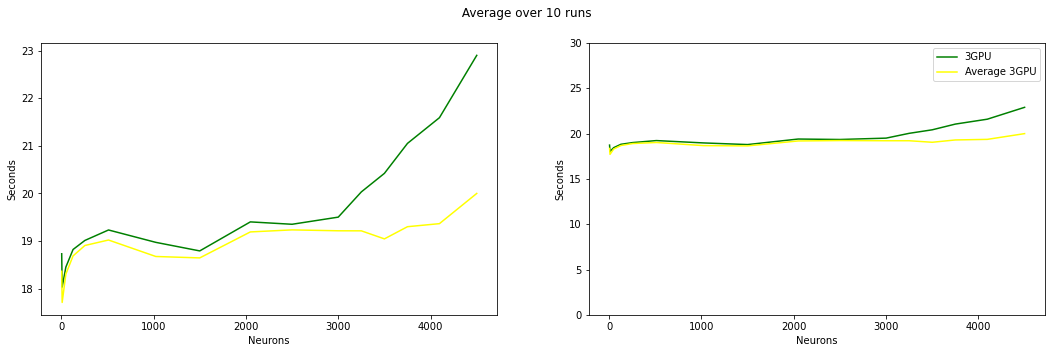

In [19]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,5))
fig.suptitle(' Average over 10 runs ')
ax1.set(xlabel='Neurons', ylabel='Seconds')
ax1.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax1.plot(neurons, frod_times_avg, 'yellow' ,label='Average')

ax2.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax2.plot(neurons, frod_times_avg, 'yellow' ,label='Average 3GPU')
ax2.set_ylim(0,30)
ax2.set(xlabel='Neurons', ylabel='Seconds')
plt.legend()

# DELETED
#plt.savefig('../saved_results/figures/gpu_comp.png', bbox_inches='tight')
plt.show()

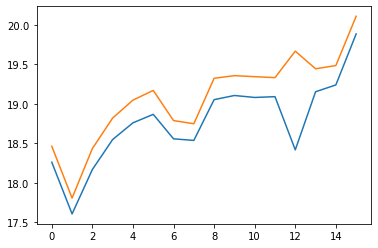

In [20]:
import numpy as np

# loading the 10 csvs into a list of dataframes
dfs = []
for i in range(10):
    dfs.append(pd.read_csv('../saved_results/frodo/' + str(i+1) + '.csv')) 

# dict containing the 16 times (values) for the 10 measurements (keys)
times = {}
for j in range(10):
    times[j] = []
    for i in dfs[j].values.tolist():
        times[j].append(i[1])

#print(times[0])

# std part 
stds = []
timesarray = []
timesdic = {}
for j in range(16):
    timesdic[j] = []
    for i in range(10):
        timesdic[j].append(times[i][j])
    #print(timesdic[j])
    stds.append(np.std(np.asarray(timesdic[j])))

min = np.asarray(frod_times_avg)-np.asarray(stds)
max = np.asarray(frod_times_avg)+np.asarray(stds)
plt.plot(min)
plt.plot(max)
plt.show()

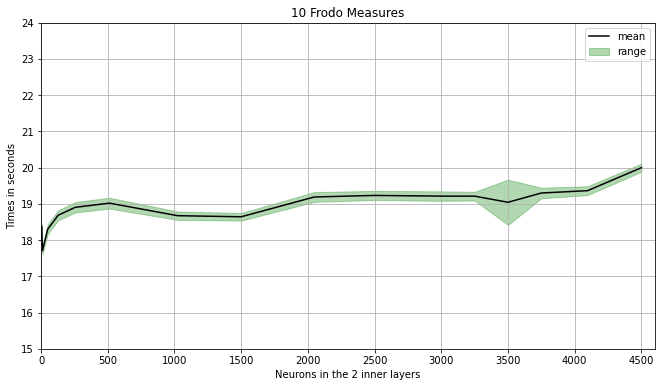

In [25]:
# Comparing the 10 measures used for the 'average'
plt.figure(figsize=(11,6))
plt.title('10 Frodo Measures')
min = np.asarray(frod_times_avg)-np.asarray(stds) 
max = np.asarray(frod_times_avg)+np.asarray(stds)


plt.ylim(15,24)
plt.ylabel('Times in seconds')
plt.xlim(-1,4600)
plt.xlabel('Neurons in the 2 inner layers')
plt.grid(True)
plt.xticks([i for i in range(0,5000,500)])
plt.plot(neurons, frod_times_avg, color='black', label='mean')
plt.fill_between(neurons,min.tolist(),max.tolist(),alpha=.3, color='green', label='range')
plt.legend()

plt.savefig('../saved_results/figures/10measures.png', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


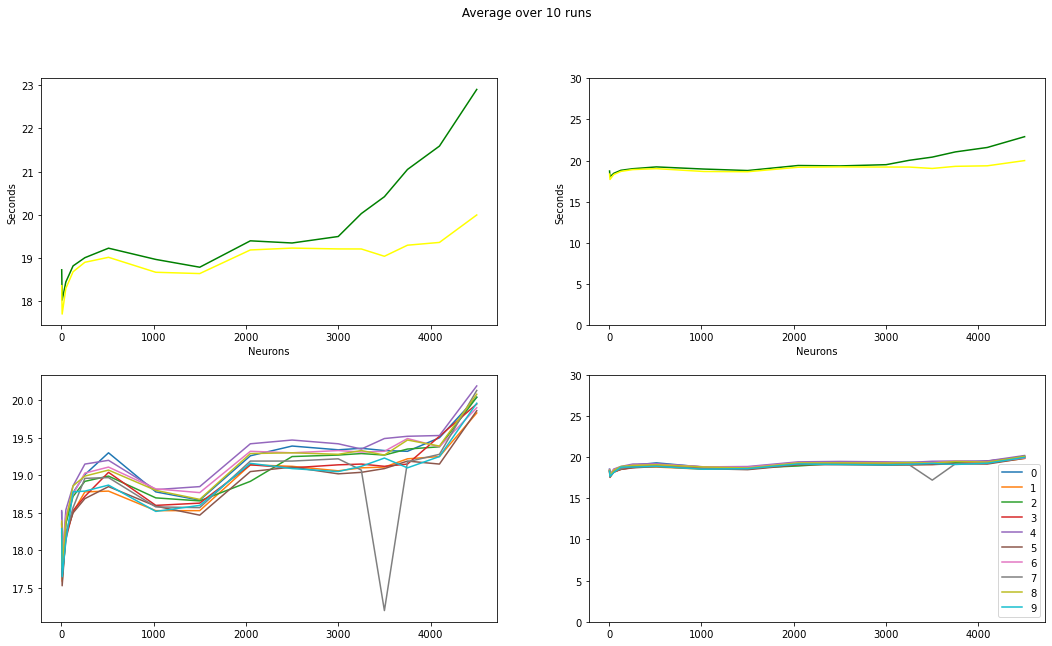

In [22]:
# Combination 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(18,10))
fig.suptitle(' Average over 10 runs ')
ax1.set(xlabel='Neurons', ylabel='Seconds')
ax1.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax1.plot(neurons, frod_times_avg, 'yellow' ,label='Average')

ax2.plot(neurons, frodo_times_3, 'g', label='3GPU')
ax2.plot(neurons, frod_times_avg, 'yellow' ,label='Average 3GPU')
ax2.set_ylim(0,30)
ax2.set(xlabel='Neurons', ylabel='Seconds')
plt.legend()


#ax3.title('10 Frodo Measures')
for i in range(10):
    ax3.plot(neurons, times[i], label=i)
plt.legend()

ax4.set_ylim(0,30)
#ax4.title('10 Frodo Measures')
for i in range(10):
    ax4.plot(neurons, times[i], label=i)
plt.legend()


plt.savefig('../saved_results/figures/average_comp.png', bbox_inches='tight')
plt.show()

In [23]:
def plot(fig):
    fig.plot(neurons, pi_times, 'b', label = 'RaspPi')
    fig.plot(neurons, frodo_times_1, 'r', label = '1 GPU')
    fig.plot(neurons, frodo_times_3, 'g', label = '3 GPU')
    fig.plot(neurons, mac_times, 'gray', label='Mac')
    fig.legend()


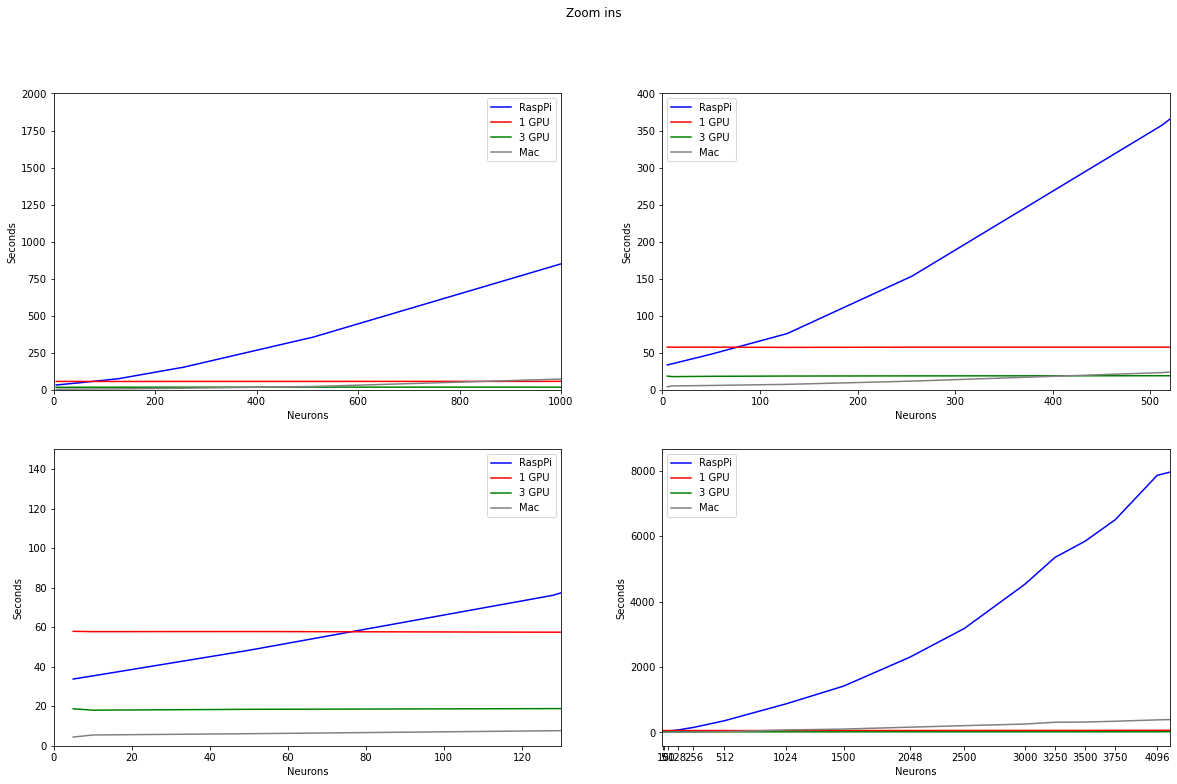

In [24]:
fig, axs = plt.subplots(2,2 , figsize=(20,12))
fig.suptitle('Zoom ins')
axs[0,0].set_xlim(0,1000)
axs[0,0].set_ylim(0,2000)

plot(axs[0,0])

plt.xticks(neurons)
axs[0,1].set_xlim(0,520)
axs[0,1].set_ylim(0,400)
#axs[0,1].set_xticks(neurons)
plot(axs[0,1])


axs[1,0].set_xlim(0,130)
axs[1,0].set_ylim(0,150)
plot(axs[1,0])

axs[1,1].set_xlim(0,4200)
plot(axs[1,1])

for ax in axs.flat:
    ax.set(xlabel='Neurons', ylabel='Seconds')

plt.savefig('../saved_results/figures/subplots_zoom.png', bbox_inches='tight', pad_inches = 1)
plt.show()


Batch2

In [80]:
one = pd.read_csv('../saved_results/frodo/batch2_1.csv')
two = pd.read_csv('../saved_results/frodo/batch2_2.csv')
three = pd.read_csv('../saved_results/frodo/batch2_3.csv')

In [87]:
batch2_neurons = []
for i in one.values.tolist()[::4]:
        batch2_neurons.append(i[0])

# layers 2,4,6,8 == keys 1,2,3,4
dict1 = {'1':[], '2':[], '3':[], '4':[]}
dict2 = {'1':[], '2':[], '3':[], '4':[]}
dict3 = {'1':[], '2':[], '3':[], '4':[]}
for j in range(1,5):
    for i in one.values.tolist()[(j-1)::4]:
        dict1[str(j)].append(i[2])
    for i in two.values.tolist()[(j-1)::4]:
        dict2[str(j)].append(i[2])
    for i in three.values.tolist()[(j-1)::4]:
        dict3[str(j)].append(i[2])
    


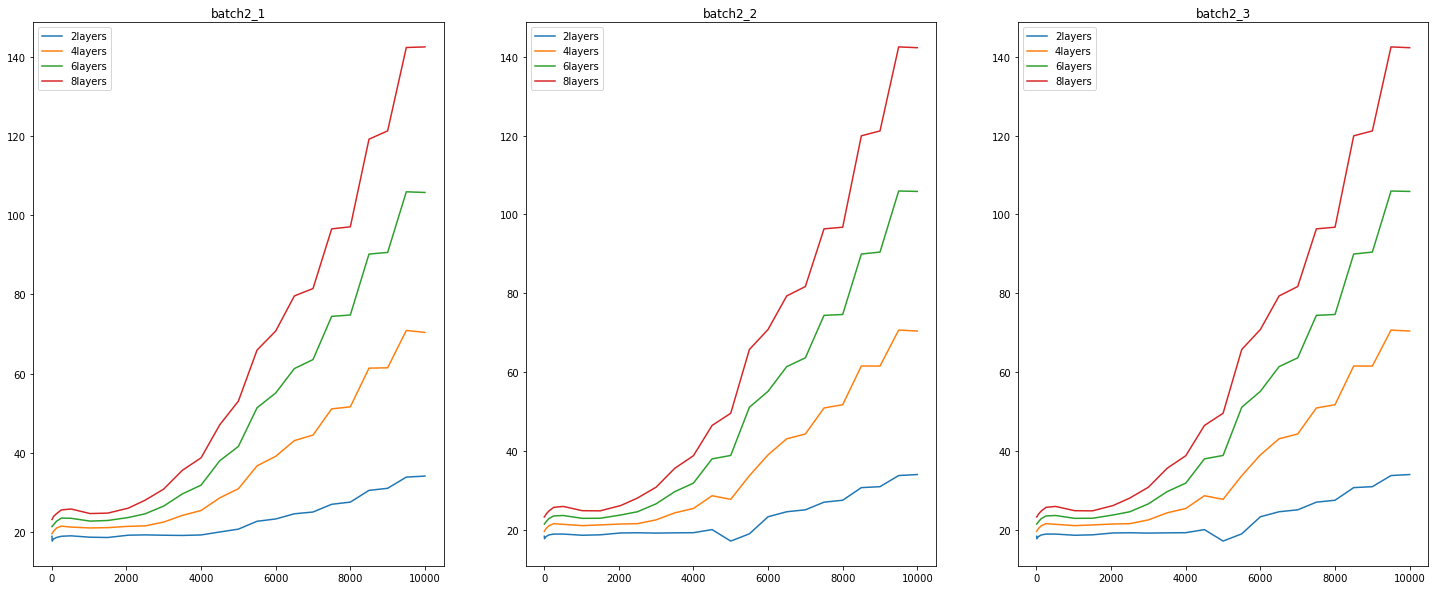

In [93]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(25,10))

for i in range(1,5):
    ax1.plot(batch2_neurons, dict1[str(i)], label=str(2*i) + 'layers')
ax1.title.set_text('batch2_1')
ax1.legend()
for i in range(1,5):
    ax2.plot(batch2_neurons, dict2[str(i)], label=str(2*i) + 'layers')
ax2.title.set_text('batch2_2')
ax2.legend()
for i in range(1,5):
    ax3.plot(batch2_neurons, dict2[str(i)], label=str(2*i) + 'layers')
ax3.title.set_text('batch2_3')
ax3.legend()

plt.show()

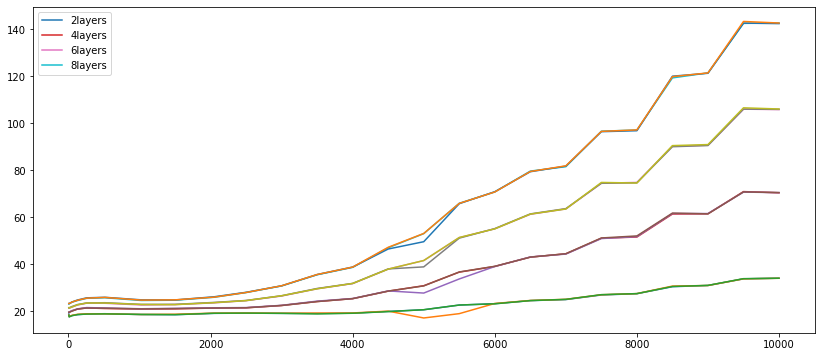

In [90]:
batch2_neurons
dict1['4']

plt.figure(figsize=(14,6))
for i in range(1,5):
    plt.plot(batch2_neurons, dict1[str(i)], label=str(2*i) + 'layers')
    plt.plot(batch2_neurons, dict2[str(i)])#, label=str(2*i) + 'layers')
    plt.plot(batch2_neurons, dict3[str(i)])#, label=str(2*i) + 'layers')
plt.legend()
plt.show()

In [96]:
# batch2_neurons
dict1['1']
# neurons
frod_times_avg

[18.362,
 17.707,
 18.302,
 18.685,
 18.904,
 19.019,
 18.673,
 18.643,
 19.189,
 19.232,
 19.213,
 19.212,
 19.043,
 19.299,
 19.363,
 19.998]

In [147]:
neur_fix2 = [x for x in neurons if x!= 3250.0]
neur_fix2 = [x for x in neur_fix2 if x!= 3750.0]
neur_fix2

[5.0,
 10.0,
 50.0,
 128.0,
 256.0,
 512.0,
 1024.0,
 1500.0,
 2048.0,
 2500.0,
 3000.0,
 3500.0,
 4000.0,
 4500.0]

In [148]:
del frod_times_avg[11]
del frod_times_avg[-1]
len(frod_times_avg)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


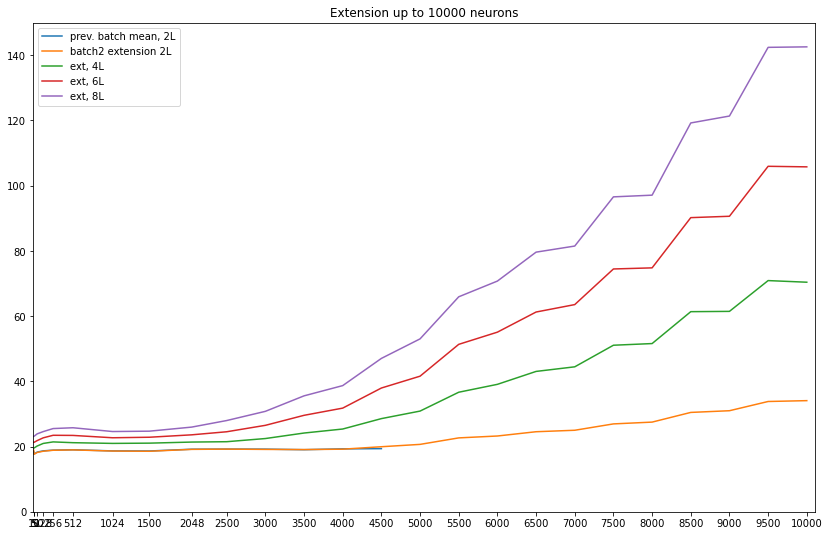

In [176]:
plt.figure(figsize=(14,9))
plt.title('Extension up to 10000 neurons')
plt.xlim(0,10100)
plt.ylim(0,150)
plt.xticks(batch2_neurons)
plt.plot(neur_fix2, frod_times_avg, label='prev. batch mean, 2L')
plt.plot(batch2_neurons, dict1['1'], label='batch2 extension 2L')
plt.plot(batch2_neurons, dict1['2'], label='ext, 4L')
plt.plot(batch2_neurons, dict1['3'], label='ext, 6L')
plt.plot(batch2_neurons, dict1['4'], label='ext, 8L')
plt.legend()
plt.savefig('../saved_results/figures/plot_extension.eps', bbox_inches='tight', pad_inches = 1)
plt.show()

In [159]:
print(frod_times_avg[13])
print(dict1['1'][13])

19.363
19.95


In [160]:
print(frod_times_avg[12])
print(dict1['1'][12])

19.299
19.2
